# Librerias

In [135]:
import pandas as pd
import sqlite3 as sql
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.tree import export_text
from sklearn.preprocessing import LabelEncoder
import sys
import matplotlib.pyplot as plt
import joblib

## 2016

In [136]:
d2016 = pd.read_csv("https://raw.githubusercontent.com/auramolina/Analitica-en-recursos-humanos/main/Datos/df_2016")
d2016

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementDate,Attrition:1,retirementDate:1,retirementType:1,resignationReason:1
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,...,3.0,4.0,2.0,3,3,NaN,NaN,NaN,NaN,NaN
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,4412,Female,1,Research Scientist,...,3.0,2.0,4.0,2,4,NaN,NaN,NaN,NaN,NaN
2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,...,2.0,2.0,1.0,3,3,NaN,NaN,NaN,NaN,NaN
3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,...,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN,NaN
4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,...,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,...,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN,NaN
4406,29,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,...,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN,NaN
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,...,1.0,3.0,3.0,3,4,NaN,NaN,NaN,NaN,NaN
4408,42,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,...,4.0,1.0,3.0,2,3,NaN,NaN,NaN,NaN,NaN


In [137]:
d2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeID               4410 non-null   int64  
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [138]:
# Duplicados
display(d2016[d2016.duplicated(keep='last')])
display(d2016[d2016.duplicated(keep='first')])

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementDate,Attrition:1,retirementDate:1,retirementType:1,resignationReason:1


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementDate,Attrition:1,retirementDate:1,retirementType:1,resignationReason:1


In [139]:
# Drop a variables no necesarias
d2016 = d2016.drop(['InfoDate', 'retirementDate','Attrition:1', 'retirementDate:1','retirementType:1','resignationReason:1'], axis=1)

# Base 2015

In [140]:
d2015 = pd.read_csv("https://raw.githubusercontent.com/auramolina/Analitica-en-recursos-humanos/main/Datos/df_2015")

In [141]:
# Ver los datos
d2015.sort_values(by=['EmployeeID'],ascending=1)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementDate,Attrition_Yes,retirementType_Fired,retirementType_Resignation,resignationReason_Others,resignationReason_Salary,resignationReason_Stress
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,...,2.0,3,3,NaN,False,False,False,False,False,False
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,...,4.0,2,4,2016-10-15 00:00:00,True,False,True,True,False,False
2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,...,1.0,3,3,NaN,False,False,False,False,False,False
3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,...,3.0,2,3,NaN,False,False,False,False,False,False
4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,...,3.0,3,3,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,29,Travel_Rarely,Research & Development,7,1,Life Sciences,8792,Female,1,Research Scientist,...,2.0,3,4,NaN,False,False,False,False,False,False
4386,33,Travel_Rarely,Sales,11,4,Marketing,8797,Male,1,Research Scientist,...,1.0,2,4,NaN,False,False,False,False,False,False
4388,33,Travel_Rarely,Sales,1,3,Life Sciences,8799,Male,2,Manager,...,4.0,3,3,NaN,False,False,False,False,False,False
4391,32,Travel_Rarely,Sales,23,1,Life Sciences,8802,Male,3,Healthcare Representative,...,1.0,3,3,NaN,False,False,False,False,False,False


In [142]:
d2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         4410 non-null   int64  
 1   BusinessTravel              4410 non-null   object 
 2   Department                  4410 non-null   object 
 3   DistanceFromHome            4410 non-null   int64  
 4   Education                   4410 non-null   int64  
 5   EducationField              4410 non-null   object 
 6   EmployeeID                  4410 non-null   int64  
 7   Gender                      4410 non-null   object 
 8   JobLevel                    4410 non-null   int64  
 9   JobRole                     4410 non-null   object 
 10  MaritalStatus               4410 non-null   object 
 11  MonthlyIncome               4410 non-null   int64  
 12  NumCompaniesWorked          4391 non-null   float64
 13  PercentSalaryHike           4410 

In [143]:
# Duplicados
display(d2015[d2015.duplicated(keep='last')])
display(d2015[d2015.duplicated(keep='first')])

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementDate,Attrition_Yes,retirementType_Fired,retirementType_Resignation,resignationReason_Others,resignationReason_Salary,resignationReason_Stress


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementDate,Attrition_Yes,retirementType_Fired,retirementType_Resignation,resignationReason_Others,resignationReason_Salary,resignationReason_Stress


In [144]:
# Observar los nulos de la base de datos
d2015.isnull().sum()

,0
Age,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeID,0
Gender,0
JobLevel,0
JobRole,0


In [145]:
#Función para imputar datos nulos

def imp_datos (df, variables):
    for variable in variables:
        # Calcula la moda de la variable
        moda = df[variable].mode()[0]  # Selecciona el primer valor de la moda en caso de que haya múltiples modas
        # Imputa los valores nulos con la moda
        df[variable].fillna(moda, inplace=True)
        # Imprime información sobre los valores nulos imputados
        nulos_imputados = df[variable].isnull().sum()
    # Devuelve el DataFrame modificado
    return df


# imputar datos nulos para NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance
d2015 = imp_datos(d2015, ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'])

In [146]:
## Se eliminan las variables que no se necesitan o no aportan
d2015 = d2015.drop(['InfoDate', 'retirementDate'], axis=1)

In [147]:
#observar si ya no quedan nulos
d2015.isnull().sum()

,0
Age,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeID,0
Gender,0
JobLevel,0
JobRole,0


In [148]:
# Convertir los boleanos a enteros
# True = 1
#False
d2015[d2015.select_dtypes(include='bool').columns] = d2015.select_dtypes(include='bool').astype(object)

In [149]:
d2015['Attrition_Yes'].value_counts()

,count
Attrition_Yes,
False,3760
True,650


# Exploración variables númericas

In [150]:
# Descirpción de los datos
d2015.describe()

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2266.500000,2.063946,65029.312925,2.687528,15.209524,0.793878,11.277324,2.799320,7.008163,2.187755,4.123129,2.725170,2.734014,2.763492,2.729932,3.153741
std,9.133301,8.105026,1.023933,1459.625988,1.106689,47068.888559,2.495967,3.659108,0.851883,7.774490,1.288978,6.125135,3.221699,3.567327,1.089852,1.102071,0.703541,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1103.250000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,2205.500000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,3307.750000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,8813.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


<Axes: >

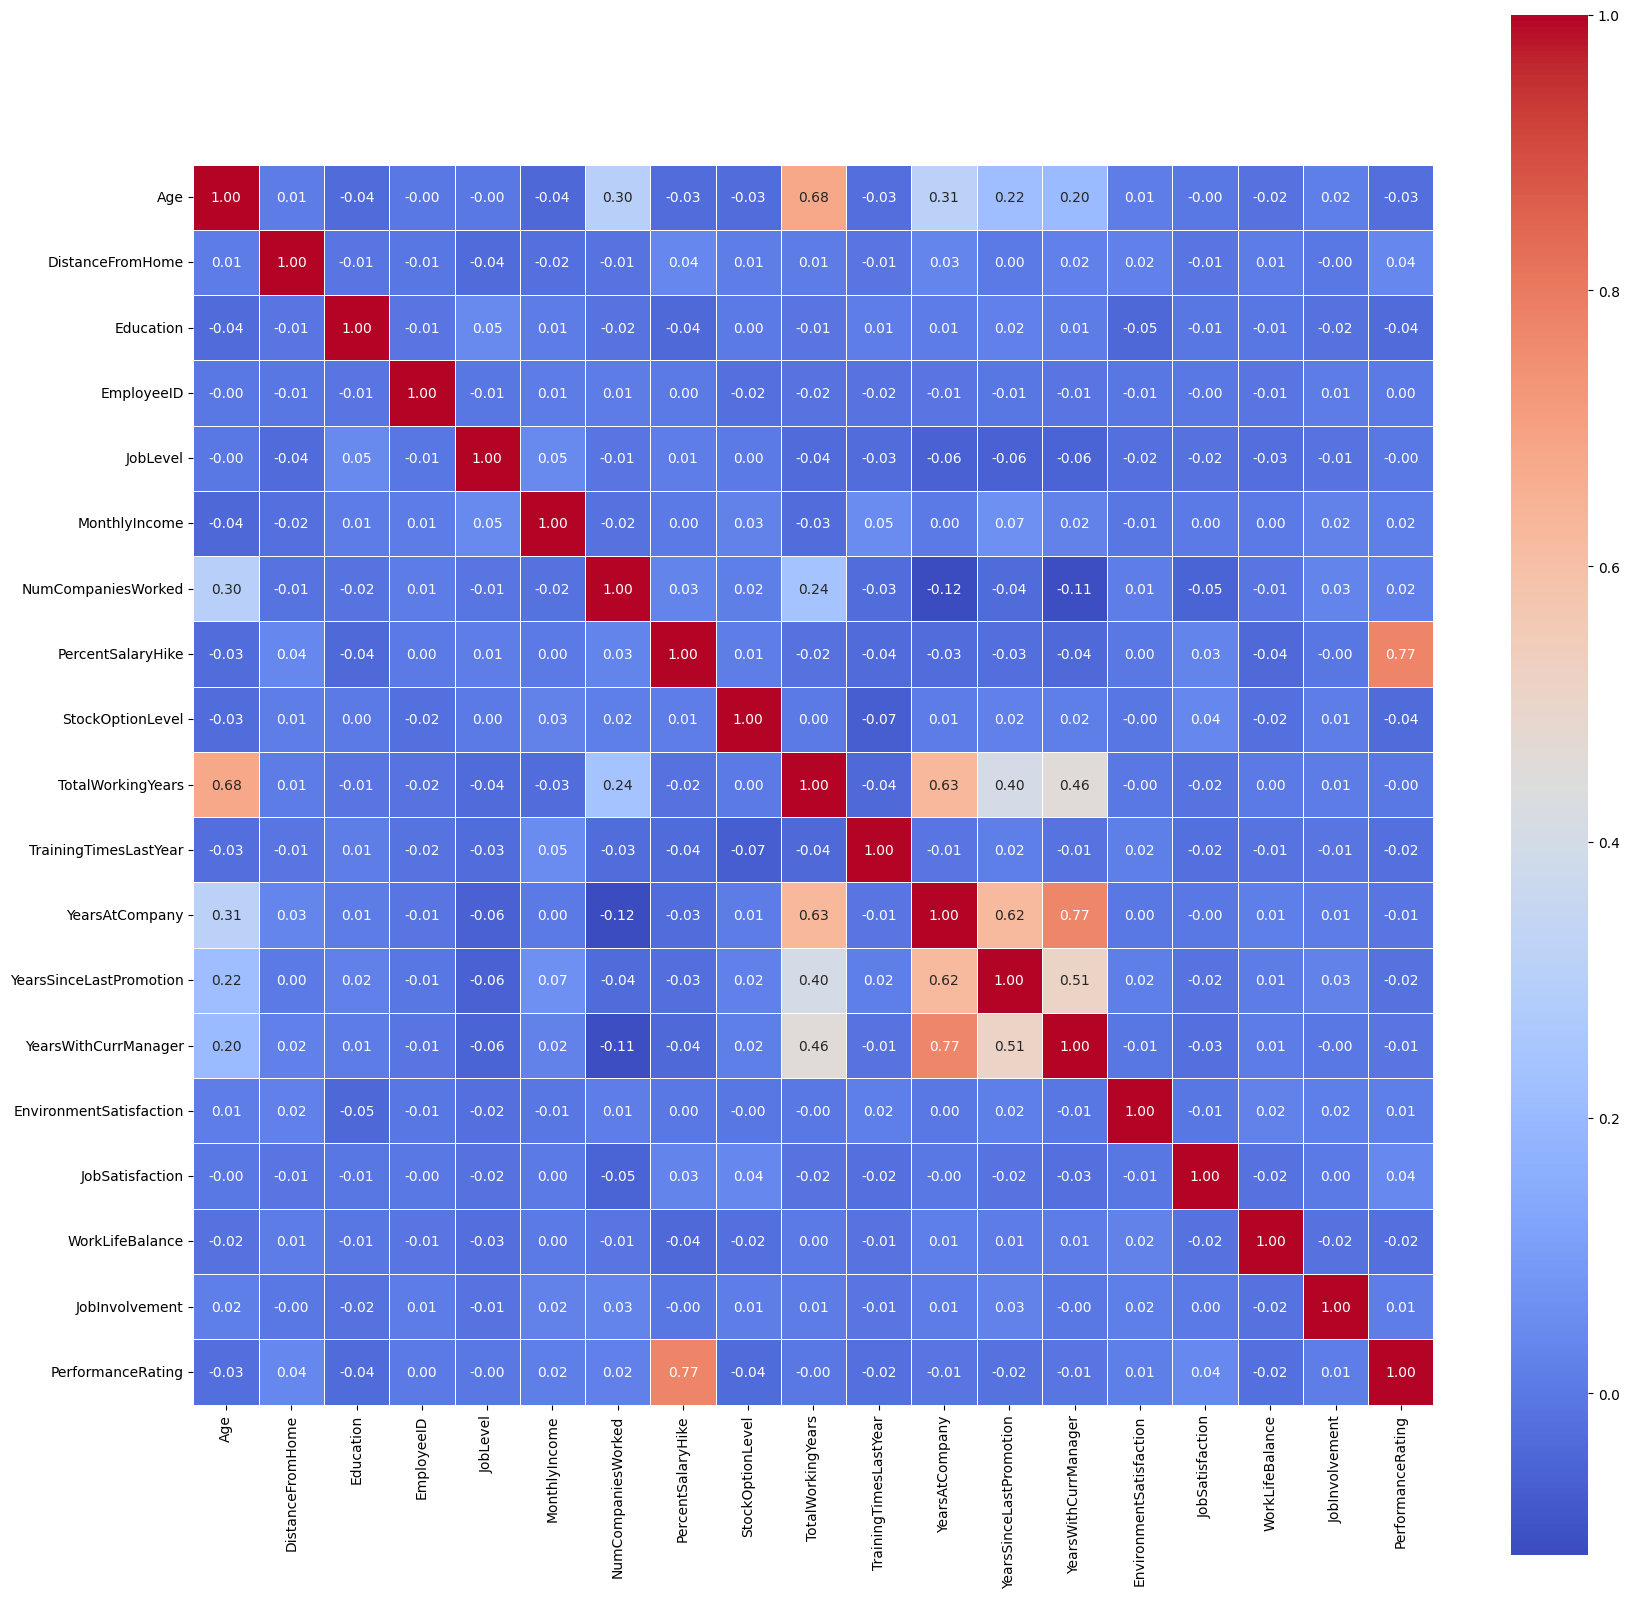

In [151]:
nc = d2015.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 20))
sns.heatmap(nc.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=.5)

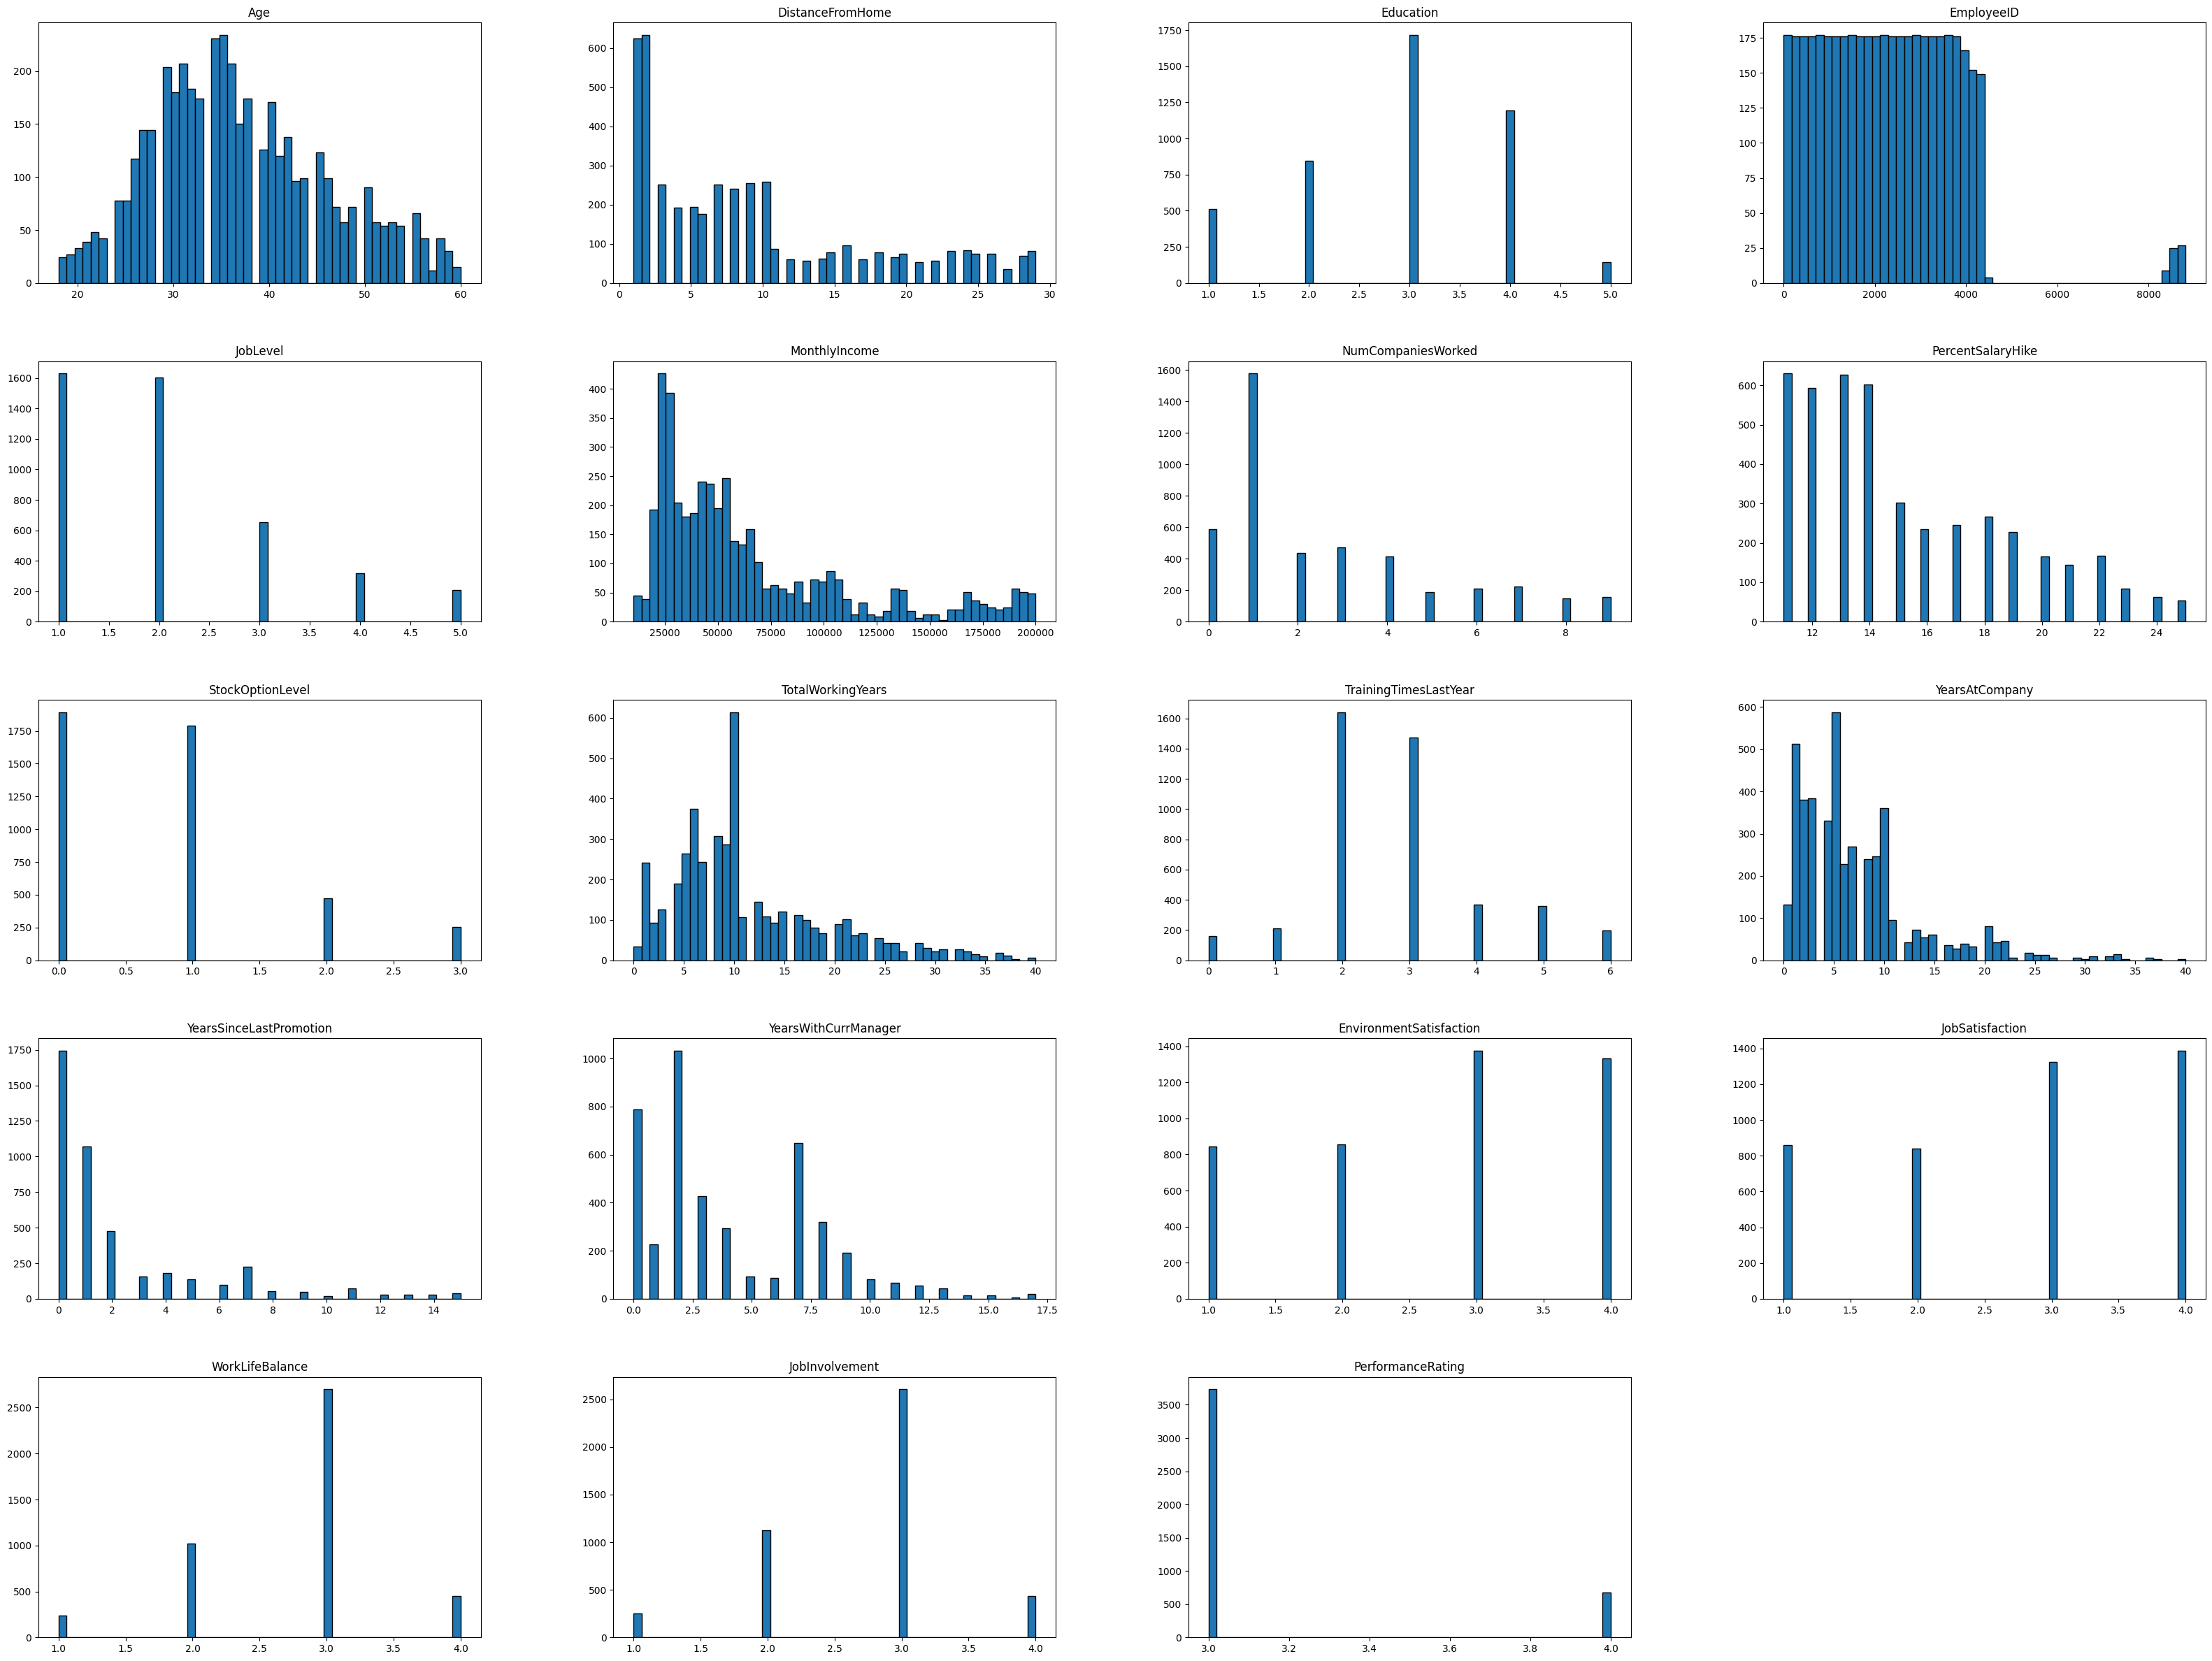

In [152]:
####explorar variables numéricas con histograma
fig=nc.hist(bins=50, figsize=(40,30),grid=False,ec='black')
plt.show()

# Análisis varibales categoricas

In [153]:
d2015.describe(include="object")

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Attrition_Yes,retirementType_Fired,retirementType_Resignation,resignationReason_Others,resignationReason_Salary,resignationReason_Stress
count,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410
unique,3,3,6,2,9,3,2,2,2,2,2,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,False,False,False,False,False,False
freq,3129,2883,1818,2646,978,2019,3760,4345,3825,4114,4237,4294


In [154]:
cc = d2015.select_dtypes(include=['object'])

In [155]:
#resumen de las variables categoricas para observar el balanceo de las categoricas
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

cat_cols = [col for col in cc.columns if cc[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(cc, col, plot=False)

                   BusinessTravel      Ratio
BusinessTravel                              
Travel_Rarely                3129  70.952381
Travel_Frequently             831  18.843537
Non-Travel                    450  10.204082
##########################################
                        Department      Ratio
Department                                   
Research & Development        2883  65.374150
Sales                         1338  30.340136
Human Resources                189   4.285714
##########################################
                  EducationField      Ratio
EducationField                             
Life Sciences               1818  41.224490
Medical                     1392  31.564626
Marketing                    477  10.816327
Technical Degree             396   8.979592
Other                        246   5.578231
Human Resources               81   1.836735
##########################################
        Gender  Ratio
Gender               
Male      2646   60.

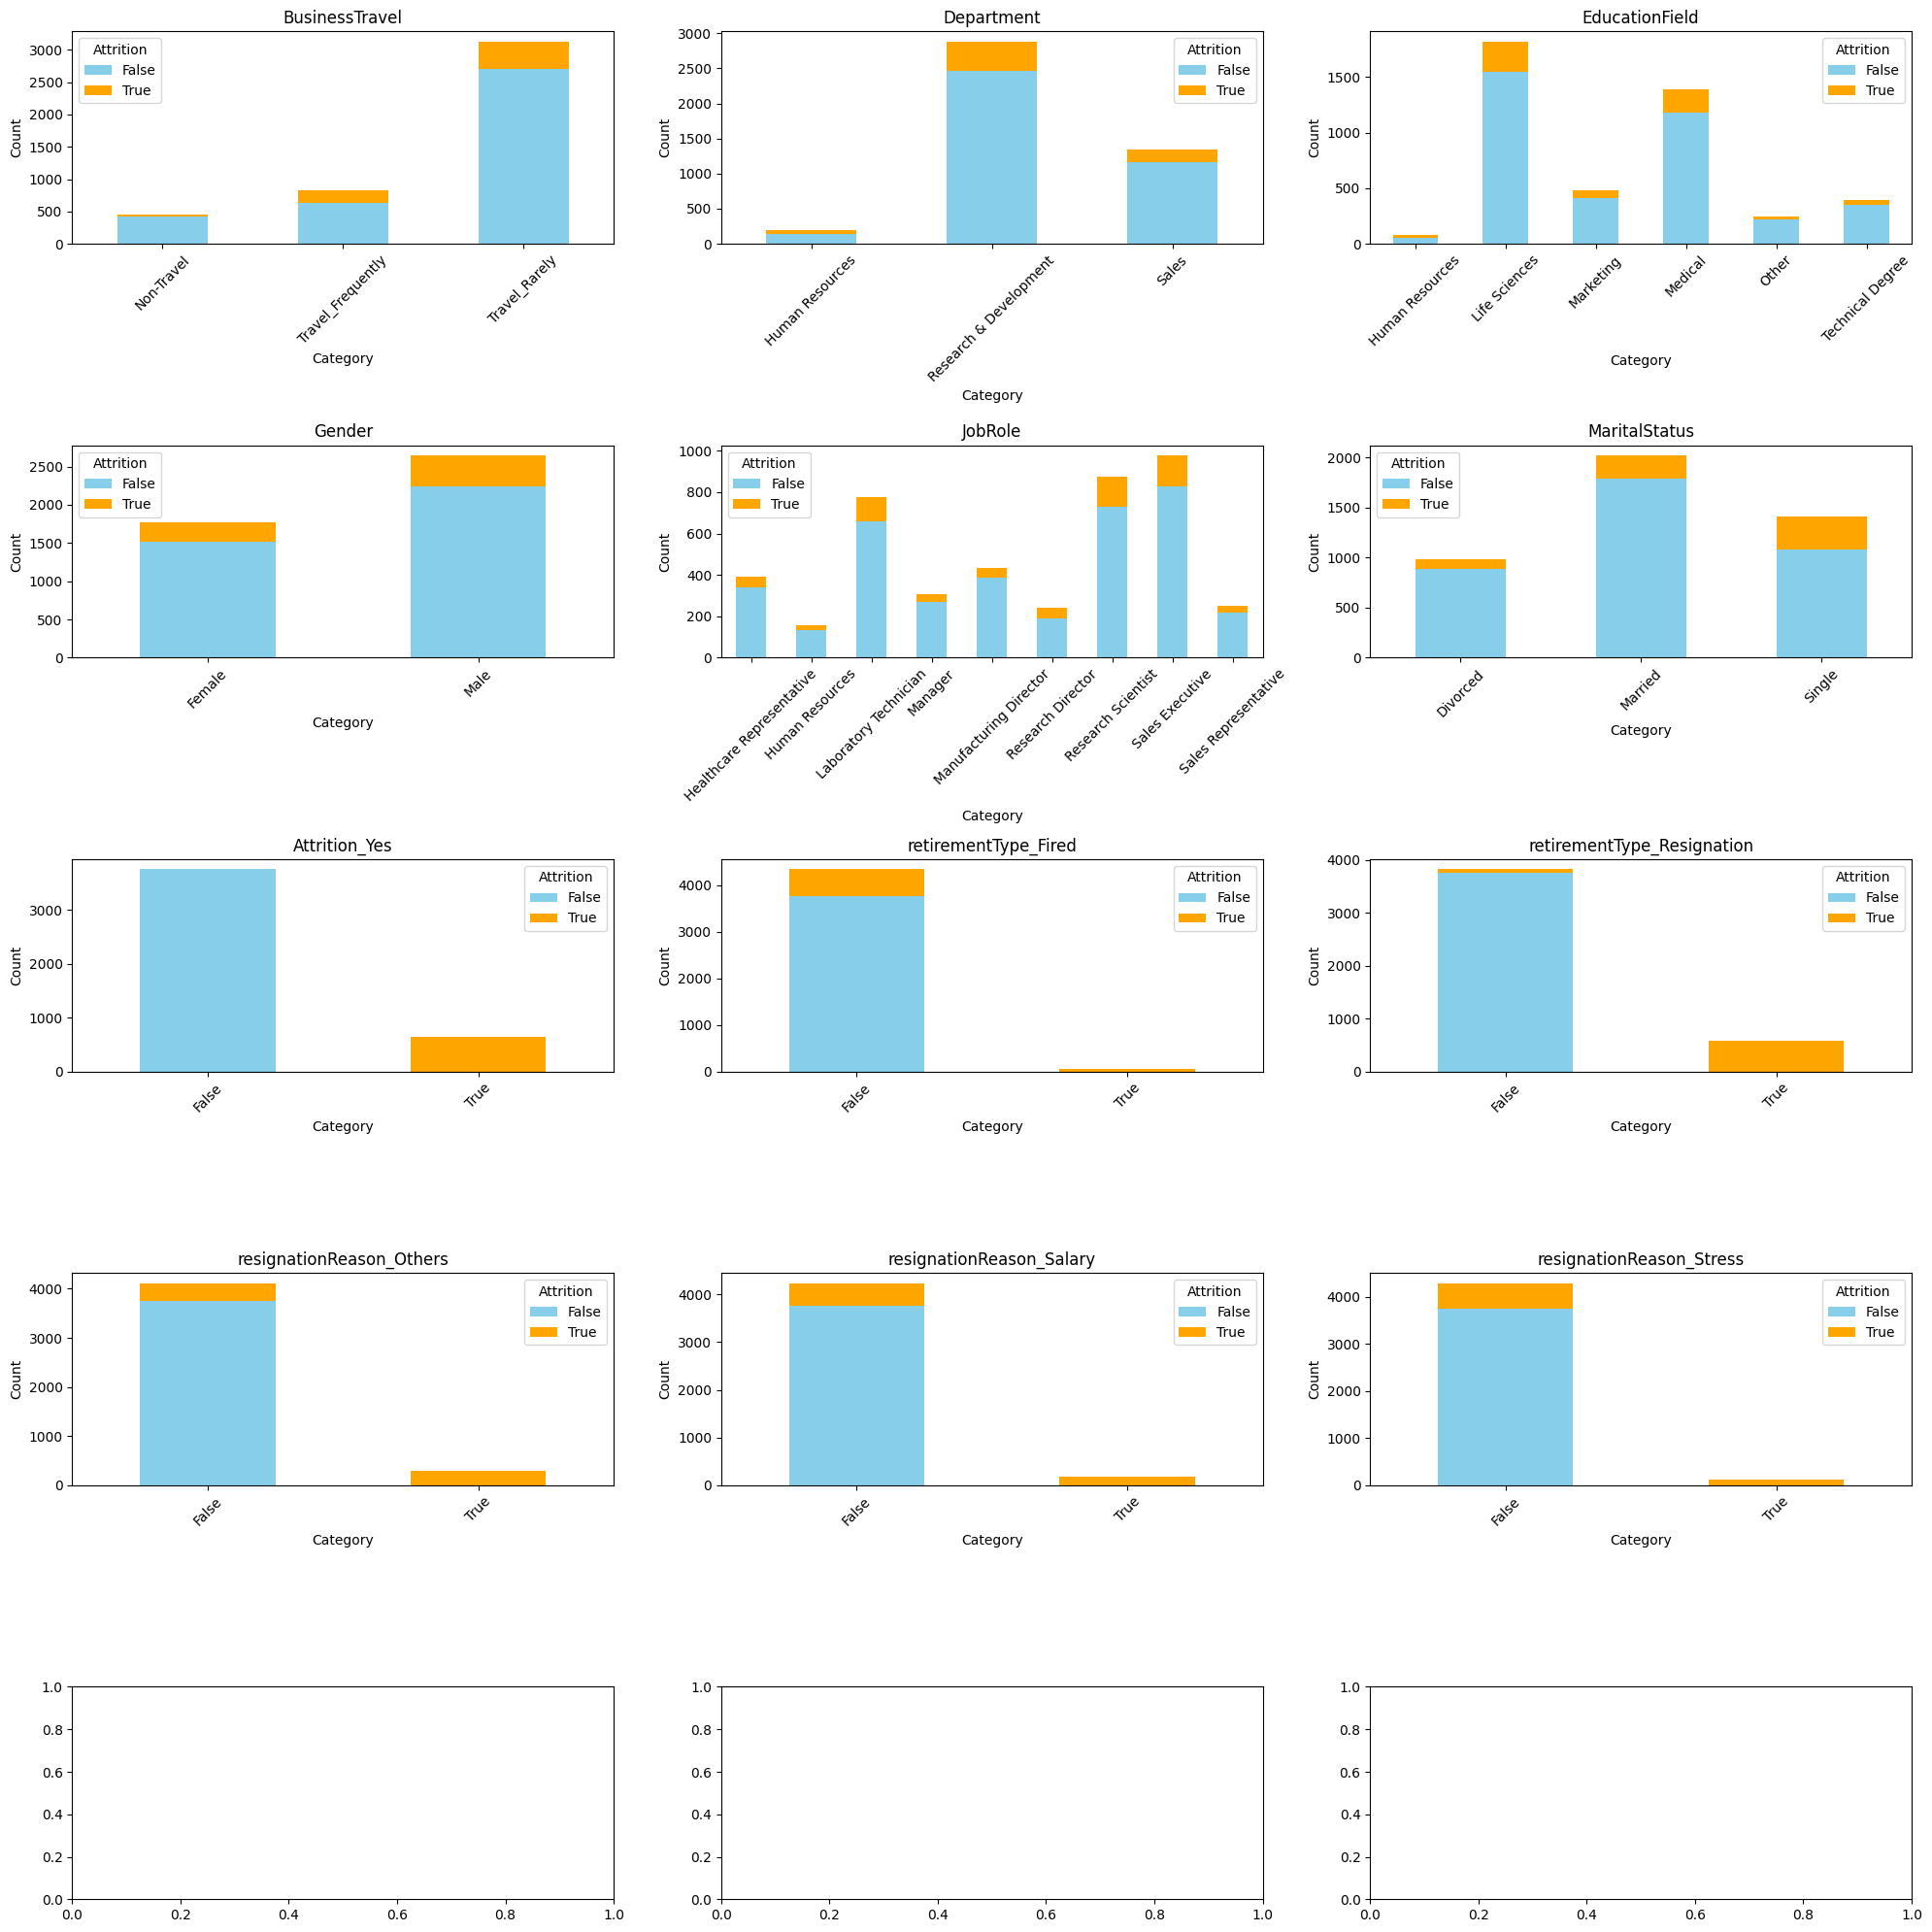

In [156]:
# Graficos para la comparación de las variables categoricas

# Definir el número de filas y columnas para los subplots
num_rows = 5
num_cols = 3

# Crear una figura y ejes de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Aplanar los ejes de los subplots para facilitar el bucle
axes = axes.flatten()

# Iterar sobre las variables categóricas y trazar gráficos de barras apiladas
for i, col in enumerate(cc.columns):
    ax = axes[i]
    crosstab = pd.crosstab(cc[col], d2015['Attrition_Yes'])
    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'orange'])
    ax.set_title(col)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Attrition')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()